In [1]:
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hf = h5py.File("C:\OOP\ProRF_server\AData\save_nrmse.jld2", "r")

ycol = ['AB', 'avGFP_brt', 'avGFPs_em', 'avGFPs_ex', 'avGFPs_brt', 'DsReds', 'eqFP578s', 'GB1', 'GB1p', 'gGB1', 'Pab1', 'RBs_cat', 'RBs_c', 'TDP43', 'Ube4b']
xcol = ['BLO', 'a', 'b', 'c', 'a, b', 'b, c', 'a, c', 'a, b, c']

In [3]:
data = hf.get('nrmse_matrix')
data = np.transpose(data[()])
data_matrix = np.vstack([[i / i[0]] for i in data])

dataset_order = np.flip(np.argsort(np.sum(data_matrix, axis=1)))

ycol = np.asarray(ycol)[dataset_order]
data = data[dataset_order, :]
data_matrix = data_matrix[dataset_order, :]

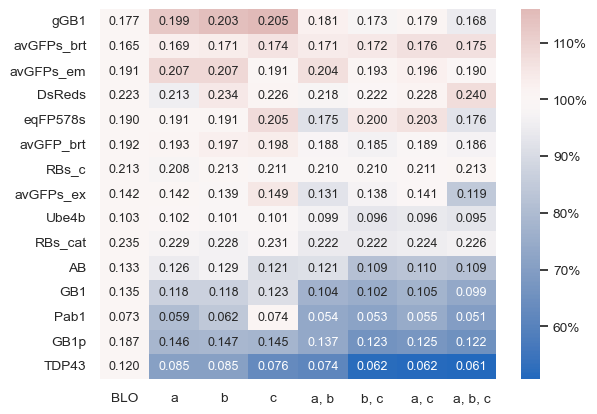

In [4]:
plt.rcParams["font.family"] = "Arial"
sns.set(font_scale=0.9)
sns.heatmap(data_matrix * 100, annot=data, center=100, fmt=".3f", cmap="vlag", cbar_kws={'format': '%.0f%%'}, annot_kws={"size": 9}, yticklabels=ycol, xticklabels=xcol)
plt.savefig("Fig/f2.tiff", dpi=600, bbox_inches="tight")
plt.show()
plt.close()